In [1]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import plotly as py
import fuzzywuzzy

In [2]:
apr14_uber = pd.read_csv('C:/Users/user/Desktop/Data Stuffs/Portfolio Projects/Uber trip analytics/2014 trip data (Apr to Sep)/uber-raw-data-apr14.csv', parse_dates= ['Date/Time'])
may14_uber = pd.read_csv('C:/Users/user/Desktop/Data Stuffs/Portfolio Projects/Uber trip analytics/2014 trip data (Apr to Sep)/uber-raw-data-may14.csv', parse_dates= ['Date/Time'])
jun14_uber = pd.read_csv('C:/Users/user/Desktop/Data Stuffs/Portfolio Projects/Uber trip analytics/2014 trip data (Apr to Sep)/uber-raw-data-jun14.csv', parse_dates= ['Date/Time'])
jul14_uber = pd.read_csv('C:/Users/user/Desktop/Data Stuffs/Portfolio Projects/Uber trip analytics/2014 trip data (Apr to Sep)/uber-raw-data-jul14.csv', parse_dates= ['Date/Time'])
aug14_uber = pd.read_csv('C:/Users/user/Desktop/Data Stuffs/Portfolio Projects/Uber trip analytics/2014 trip data (Apr to Sep)/uber-raw-data-aug14.csv', parse_dates= ['Date/Time'])
sep14_uber = pd.read_csv('C:/Users/user/Desktop/Data Stuffs/Portfolio Projects/Uber trip analytics/2014 trip data (Apr to Sep)/uber-raw-data-sep14.csv', parse_dates= ['Date/Time'])
jan_jun_15_uber = pd.read_csv("C:/Users/user/Desktop/Data Stuffs/Portfolio Projects/Uber trip analytics/uber-raw-data-janjune-15.csv", parse_dates=['Pickup_date'])

In [3]:
apr_may_14 = pd.concat([apr14_uber, may14_uber], ignore_index=True, sort=False)
jun_jul_14 = pd.concat([jun14_uber, jul14_uber], ignore_index=True, sort=False)
aug_sep_14 = pd.concat([aug14_uber, sep14_uber], ignore_index= True, sort=False)
apr_to_jul = pd.concat([apr_may_14, jun_jul_14], ignore_index=True, sort=False)
apr_2_sep_uber = pd.concat([apr_to_jul, aug_sep_14], ignore_index= True, sort=False)
print(apr_2_sep_uber.shape)
print(apr_2_sep_uber.isna().sum(axis = 0))
print(apr_2_sep_uber.columns)

(4534327, 4)
Date/Time    0
Lat          0
Lon          0
Base         0
dtype: int64
Index(['Date/Time', 'Lat', 'Lon', 'Base'], dtype='object')


0              April
1              April
2              April
3              April
4              April
             ...    
4534322    September
4534323    September
4534324    September
4534325    September
4534326    September
Name: Month, Length: 4534327, dtype: object
0           1
1           1
2           1
3           1
4           1
           ..
4534322    30
4534323    30
4534324    30
4534325    30
4534326    30
Name: Date, Length: 4534327, dtype: int32


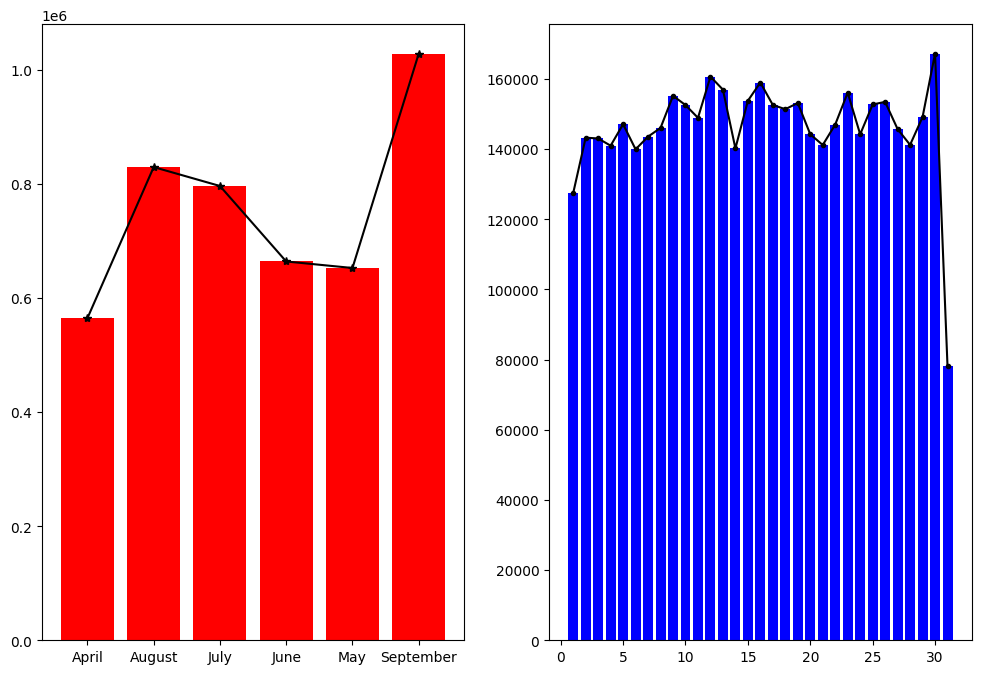

In [4]:
#doing frequency of rides per date, per month basis
'''split them into date, month first'''
map_months = {
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August',
    9: 'September'
}
apr_2_sep_uber['Month'] = apr_2_sep_uber['Date/Time'].dt.month.map(map_months)
print(apr_2_sep_uber['Month'])

apr_2_sep_uber['Date'] = apr_2_sep_uber['Date/Time'].dt.day
print(apr_2_sep_uber['Date'])

apr_2_sep_uber_mth_grp = apr_2_sep_uber.groupby('Month')['Base'].count().reset_index(name = 'Total Count')
apr_2_sep_uber_date_grp = apr_2_sep_uber.groupby('Date')['Base'].count().reset_index(name = 'Total Count')


plt.figure(figsize = (12,8))
plt.subplot(1,2,1)
plt.bar(apr_2_sep_uber_mth_grp['Month'], apr_2_sep_uber_mth_grp['Total Count'], color = 'red')
plt.plot(apr_2_sep_uber_mth_grp['Month'],apr_2_sep_uber_mth_grp['Total Count'], marker = '*', color = 'black')

plt.subplot(1,2,2)
plt.bar(apr_2_sep_uber_date_grp['Date'], apr_2_sep_uber_date_grp['Total Count'], color = 'blue')
plt.plot(apr_2_sep_uber_date_grp['Date'], apr_2_sep_uber_date_grp['Total Count'], marker = '.', color = 'black')
plt.show()


      Base      Month  Base Count
0   B02512      April       35536
1   B02512     August       31472
2   B02512       July       35021
3   B02512       June       32509
4   B02512        May       36765
5   B02512  September       34370
6   B02598      April      183263
7   B02598     August      220129
8   B02598       July      245597
9   B02598       June      242975
10  B02598        May      260549
11  B02598  September      240600
12  B02617      April      108001
13  B02617     August      355803
14  B02617       July      310160
15  B02617       June      184460
16  B02617        May      122734
17  B02617  September      377695
18  B02682      April      227808
19  B02682     August      173280
20  B02682       July      196754
21  B02682       June      194926
22  B02682        May      222883
23  B02682  September      197138
24  B02764      April        9908
25  B02764     August       48591
26  B02764       July        8589
27  B02764       June        8974
28  B02764    

<Axes: xlabel='Date', ylabel='Base Count'>

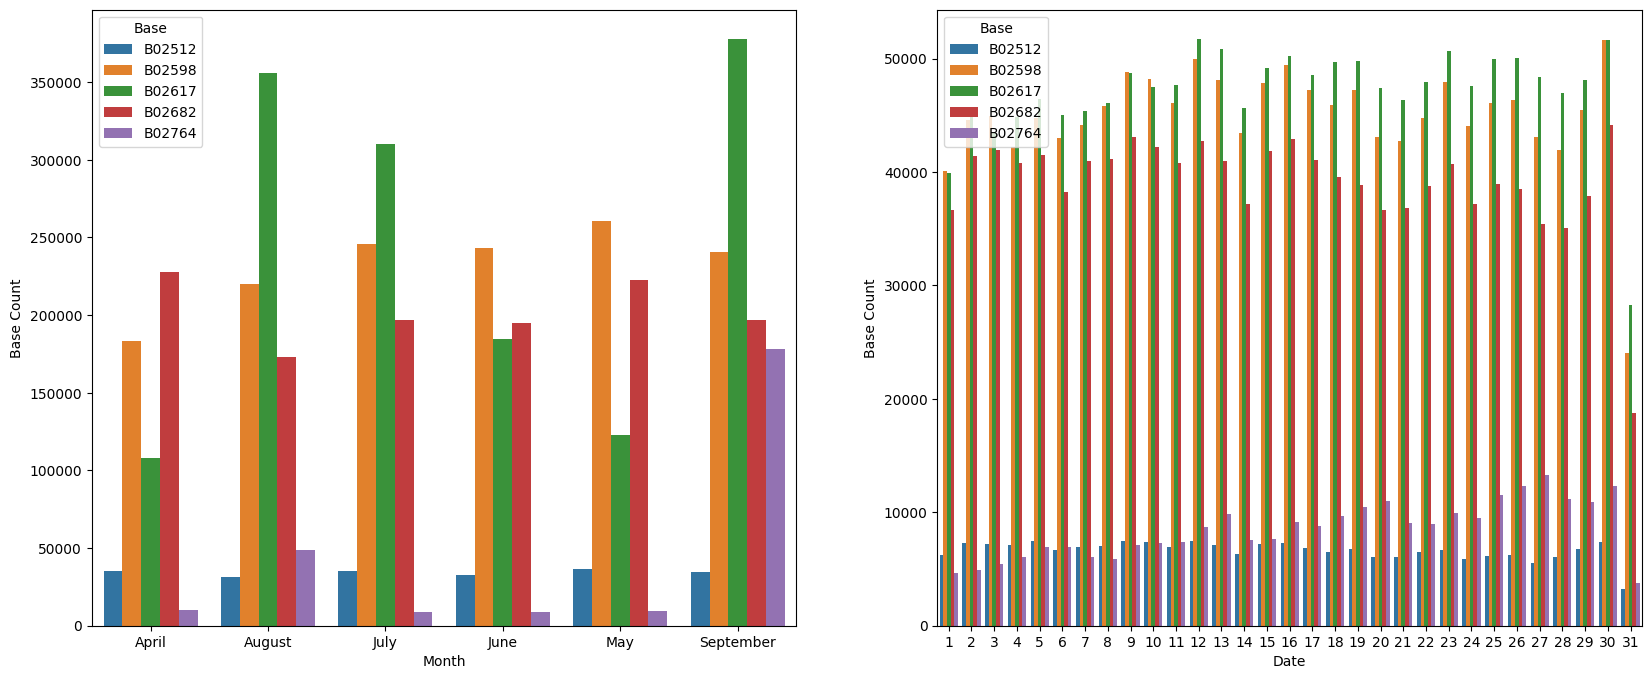

In [5]:
#Maybe can do a group by base and compare frequency and uber usage across months and dates.
apr_sep_base_mth_grp = apr_2_sep_uber.groupby(['Base', 'Month'])['Date/Time'].count().reset_index(name = 'Base Count')
apr_sep_base_date_grp = apr_2_sep_uber.groupby(['Base', 'Date'])['Date/Time'].count().reset_index(name = 'Base Count')
print(apr_sep_base_mth_grp)

plt.figure(figsize = (20,8))
plt.subplot(1,2,1)
sns.barplot(data = apr_sep_base_mth_grp, x = 'Month', y = 'Base Count', hue = 'Base')

plt.subplot(1,2,2)
sns.barplot(data = apr_sep_base_date_grp, x = 'Date', y = 'Base Count', hue = 'Base')

In [ ]:
#doing a geographical plot, for each month i guess
plt.subplot(3,3,1)
sns.scatterplot(data=apr14_uber, x='Lon', y='Lat', hue='Base')

plt.subplot(3,3,2)
sns.scatterplot(data=may14_uber, x='Lon', y='Lat', hue='Base')

plt.subplot(3,3,3)
sns.scatterplot(data=jun14_uber, x='Lon', y='Lat', hue='Base')

plt.subplot(3,3,4)
sns.scatterplot(data=jul14_uber, x='Lon', y='Lat', hue='Base')

plt.subplot(3,3,5)
sns.scatterplot(data=aug14_uber, x='Lon', y='Lat', hue='Base')

plt.subplot(3,3,6)
sns.scatterplot(data=sep14_uber, x='Lon', y='Lat', hue='Base')


In [7]:
#doing analysis by month, by base and by locationid (since there are duplicates)
print(jan_jun_15_uber.columns)
#1. doing cleaning
print(jan_jun_15_uber.isnull().sum(axis = 0), jan_jun_15_uber.shape)

jan_jun_15_uber['Affiliated_base_num'].fillna(jan_jun_15_uber['Dispatching_base_num'], inplace=True)

print(jan_jun_15_uber.isnull().sum(axis = 0))
pd.set_option('display.max_rows', 500)

Index(['Dispatching_base_num', 'Pickup_date', 'Affiliated_base_num',
       'locationID'],
      dtype='object')
Dispatching_base_num         0
Pickup_date                  0
Affiliated_base_num     162195
locationID                   0
dtype: int64 (14270479, 4)


C:\Users\user\AppData\Local\Temp\ipykernel_13076\2400735694.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  jan_jun_15_uber['Affiliated_base_num'].fillna(jan_jun_15_uber['Dispatching_base_num'], inplace=True)


Dispatching_base_num    0
Pickup_date             0
Affiliated_base_num     0
locationID              0
dtype: int64


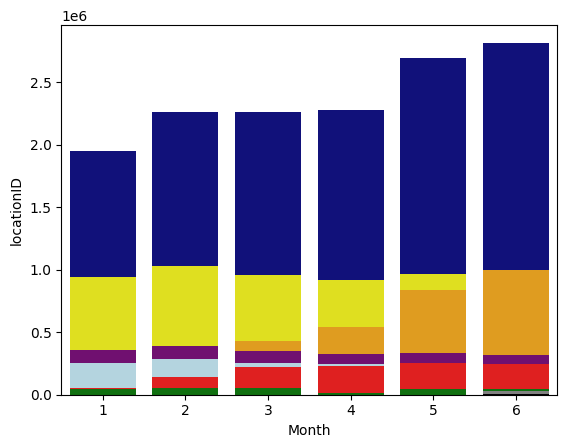

In [6]:
#analysis by month and comparing between dispatching bases
jan_jun_15_uber['Month'] = jan_jun_15_uber['Pickup_date'].dt.month
jan_jun_15_uber_grpmth = jan_jun_15_uber.groupby(['Month']).count()
jan_jun_15_uber_grpmth_B02598 = jan_jun_15_uber[jan_jun_15_uber['Dispatching_base_num'] == 'B02598'].groupby('Month').count()
jan_jun_15_uber_grpmth_B02764 = jan_jun_15_uber[jan_jun_15_uber['Dispatching_base_num'] == 'B02764'].groupby('Month').count()
jan_jun_15_uber_grpmth_B02682 = jan_jun_15_uber[jan_jun_15_uber['Dispatching_base_num'] == 'B02682'].groupby('Month').count()
jan_jun_15_uber_grpmth_B02617 = jan_jun_15_uber[jan_jun_15_uber['Dispatching_base_num'] == 'B02617'].groupby('Month').count()
jan_jun_15_uber_grpmth_B02512 = jan_jun_15_uber[jan_jun_15_uber['Dispatching_base_num'] == 'B02512'].groupby('Month').count()
jan_jun_15_uber_grpmth_B02765 = jan_jun_15_uber[jan_jun_15_uber['Dispatching_base_num'] == 'B02765'].groupby('Month').count()
jan_jun_15_uber_grpmth_B02835 = jan_jun_15_uber[jan_jun_15_uber['Dispatching_base_num'] == 'B02835'].groupby('Month').count()
jan_jun_15_uber_grpmth_B02836 = jan_jun_15_uber[jan_jun_15_uber['Dispatching_base_num'] == 'B02836'].groupby('Month').count()


totalbar = sns.barplot(jan_jun_15_uber_grpmth, x='Month', y='locationID', color='darkblue')
B02764bar = sns.barplot(jan_jun_15_uber_grpmth_B02764, x='Month', y='locationID', color='yellow')
B02682bar = sns.barplot(jan_jun_15_uber_grpmth_B02682, x='Month', y='locationID', color='orange')
B02617bar = sns.barplot(jan_jun_15_uber_grpmth_B02617, x='Month', y='locationID', color='purple')
B02598bar = sns.barplot(jan_jun_15_uber_grpmth_B02598, x='Month', y='locationID', color='lightblue')
B02765bar = sns.barplot(jan_jun_15_uber_grpmth_B02765, x='Month', y='locationID', color='red')
B02512bar = sns.barplot(jan_jun_15_uber_grpmth_B02512, x='Month', y='locationID', color='green')
B02835bar = sns.barplot(jan_jun_15_uber_grpmth_B02835, x='Month', y='locationID', color='grey')
B02836bar = sns.barplot(jan_jun_15_uber_grpmth_B02836, x='Month', y='locationID', color='black')
